In [62]:
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

from mpl_toolkits.mplot3d import axes3d    

import numpy as np
import os

plt.style.use('dark_background') 

%matplotlib inline

PATH = 'C:/Users/yanet/Documents/CV/letters/'
archivos = os.listdir(PATH)

In [63]:
# Carga de las funciones del modulo plot
def imgview(img, title=None, filename=None, axis=False, figsize=None):
    """
    imgview: funcion de visualizacion de imagen

    Par:
        img: matriz de la imagen a visualizar
        title: asignacion de titulo, por default no se coloca titulo
        filename: opcion para guardar la imagen, por default no se realiza la accion
        axis: visualizacion de los ejes, por default no se muestran
    """
    r,c = img.shape[0:2]
    if figsize != None:
        fig = plt.figure(figsize=figsize)
    else:
        k = 8
        fig = plt.figure(figsize=(k,k))
    ax = fig.add_subplot(111)
    
    if len(img.shape) == 3:
        img = ax.imshow(img,extent=None)
    else:
        img = ax.imshow(img,extent=None,cmap='gray',vmin=0,vmax=255)
    if title != None:
        ax.set_title(title,fontsize=14)
    if not axis:
        plt.axis('off')
    else:
        ax.grid(c='w')
        ax.xaxis.tick_top()
        ax.xaxis.set_label_position('top') 
        ax.set_xlabel('Columns',fontsize=14)
        ax.set_ylabel('Rows',fontsize=14)
        ax.xaxis.label.set_color('w')
        ax.yaxis.label.set_color('w')
        ax.tick_params(axis='x', colors='w',labelsize=14)
        ax.tick_params(axis='y', colors='w',labelsize=14)
        
    if filename != None:
        plt.savefig(filename)
    plt.show()

In [64]:
def imgnorm(img):
    """Nomalize an image
    Args:
        img (numpy array): Source image
    Returns:
        normalized (numpy array): Nomalized image
    """
    vmin, vmax = img.min(), img.max()
    normalized_values = []
    delta = vmax-vmin

    for p in img.ravel():
        normalized_values.append(255*(p-vmin)/delta)

    normalized  = np.array(normalized_values).astype(np.uint8).reshape(img.shape[0],-1)
    return normalized

In [65]:
def img_data(im):
    # print(im.shape)
    # _, img_bin = cv.threshold(im, 128, 255, cv.THRESH_BINARY_INV)
    im = imgnorm(im)
    img_bin = cv.adaptiveThreshold(im, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 33, 5)
    im_t = np.concatenate(img_bin, axis=0)
    # print(im_t.shape)
    return im_t

In [66]:
c = 0
X = []
y = []
for archivo in archivos:
    label = archivo
    # print(label)s
    newPATH = f"{PATH}{archivo}/"
    archivo = os.listdir(newPATH)
    print(newPATH)
    # c = 0
    # c = c + 1
    for imagen in archivo: 
        if imagen.endswith('.jpg'):
            img = os.path.join(newPATH, imagen)
            im = cv.imread(img, cv.IMREAD_GRAYSCALE)
            im_t = img_data(im)
            X.append(im_t)
            y.append(label)
            # plot.imgview(im)
    #         c = c+1
    #         if c == 1:
    #             break
    if c == 10:
        break

C:/Users/yanet/Documents/CV/letters/0/


C:/Users/yanet/Documents/CV/letters/1/
C:/Users/yanet/Documents/CV/letters/2/
C:/Users/yanet/Documents/CV/letters/3/
C:/Users/yanet/Documents/CV/letters/4/
C:/Users/yanet/Documents/CV/letters/5/
C:/Users/yanet/Documents/CV/letters/6/
C:/Users/yanet/Documents/CV/letters/7/
C:/Users/yanet/Documents/CV/letters/8/
C:/Users/yanet/Documents/CV/letters/9/
C:/Users/yanet/Documents/CV/letters/A/
C:/Users/yanet/Documents/CV/letters/B/
C:/Users/yanet/Documents/CV/letters/C/
C:/Users/yanet/Documents/CV/letters/D/
C:/Users/yanet/Documents/CV/letters/E/
C:/Users/yanet/Documents/CV/letters/F/
C:/Users/yanet/Documents/CV/letters/G/
C:/Users/yanet/Documents/CV/letters/H/
C:/Users/yanet/Documents/CV/letters/I/
C:/Users/yanet/Documents/CV/letters/J/
C:/Users/yanet/Documents/CV/letters/K/
C:/Users/yanet/Documents/CV/letters/L/
C:/Users/yanet/Documents/CV/letters/M/
C:/Users/yanet/Documents/CV/letters/N/
C:/Users/yanet/Documents/CV/letters/P/
C:/Users/yanet/Documents/CV/letters/Q/
C:/Users/yanet/Documents/

In [67]:
y = pd.DataFrame(y)
X = pd.DataFrame(np.array(X, dtype=np.float64))

In [68]:
print(X.shape)
print(y.shape)
print(im.shape)

(35500, 7500)
(35500, 1)
(100, 75)


In [69]:
y.loc[3000,:]

0    2
Name: 3000, dtype: object

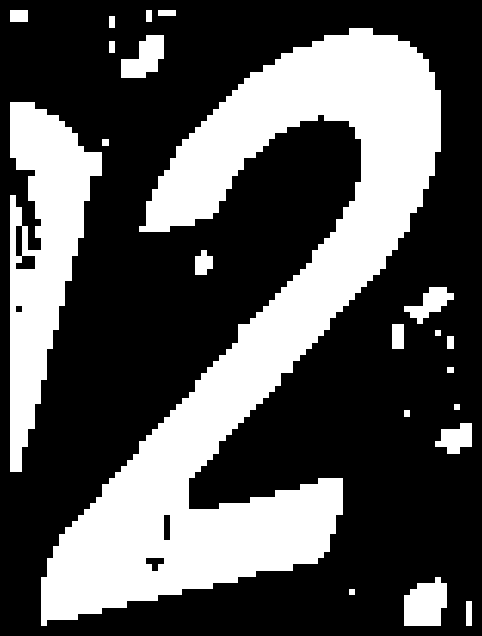

In [70]:
some_digit = X.loc[3000,:].values
some_digit_image = some_digit.reshape(100, 75)
some_digit_image = np.array(some_digit_image, dtype=np.float64)
imgview(some_digit_image)

In [71]:
# X_ = X.astype('float32') / 255.0

# Split de la data

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [73]:
y.shape

(35500, 1)

In [74]:
X_train.shape

(24850, 7500)

# Selección del Modelo

In [75]:
from sklearn.svm import SVC

params = {
    'C': 1.0,
    'kernel': 'rbf',
    'gamma': 'scale',
}

svm_model = SVC(**params)

svm_model.fit(X_train, y_train)


c:\Users\yanet\miniforge3\envs\cv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [76]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators': 100,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
}

rf_model = RandomForestClassifier(**params)

rf_model.fit(X_train, y_train)


c:\Users\yanet\miniforge3\envs\cv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [77]:
from sklearn.svm import SVC

svm_model_ = SVC(kernel='linear', C=1.0, random_state=42)
svm_model_.fit(X_train, y_train)


c:\Users\yanet\miniforge3\envs\cv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=42)

In [78]:
from sklearn.metrics import accuracy_score

y_pred = svm_model_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo SVM_:", accuracy)

Precisión del modelo SVM_: 0.9953990610328638


In [79]:
# y_pred_svm = svm_model.predict(X_test)
# accuracy_svm = accuracy_score(y_test, y_pred_svm)
# print("Precisión del modelo SVM:", accuracy_svm)

In [80]:
# y_pred_rf = rf_model.predict(X_test)
# accuracy_rf = accuracy_score(y_test, y_pred_rf)
# print("Precisión del modelo SVM:", accuracy_rf)

In [81]:
y_pred = pd.DataFrame(y_pred)

In [82]:
y_test_ = y_test.reset_index(drop=True) 
y_pred_ = y_pred.reset_index(drop=True)
X_test_ = X_test.reset_index(drop=True)

In [83]:
resultados = pd.concat([y_test_, y_pred_], axis=1)

In [84]:
r = y_test_ == y_pred_
r.value_counts()

True     10601
False       49
Name: count, dtype: int64

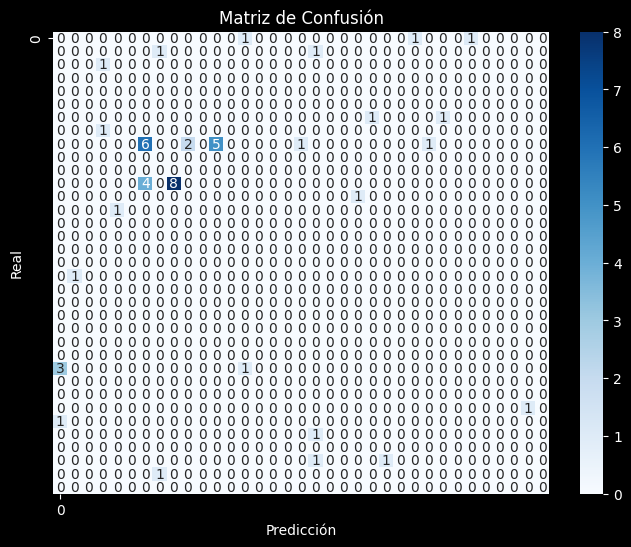

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

clases = sorted(set(y_test))
cm = confusion_matrix(y_test, y_pred)
np.fill_diagonal(cm, 0)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=clases, yticklabels=clases)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test_,y_pred_))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       306
           1       1.00      0.99      0.99       285
           2       1.00      1.00      1.00       328
           3       0.99      1.00      1.00       290
           4       1.00      1.00      1.00       280
           5       1.00      1.00      1.00       320
           6       0.97      0.99      0.98       314
           7       0.99      1.00      1.00       317
           8       0.97      0.95      0.96       327
           9       0.99      1.00      1.00       307
           A       1.00      1.00      1.00       336
           B       0.98      0.96      0.97       290
           C       1.00      1.00      1.00       305
           D       0.99      1.00      1.00       309
           E       1.00      1.00      1.00       302
           F       1.00      1.00      1.00       297
           G       1.00      1.00      1.00       325
           H       1.00    

In [87]:
import joblib
mi_modelo_ = svm_model_
mi_modelo = svm_model
mi_modelo_rf = rf_model

# Guardando el modelo entrenado
joblib.dump(mi_modelo, 'modelo_entrenado_s.pkl')
joblib.dump(mi_modelo_, 'modelo_entrenado.pkl')
joblib.dump(mi_modelo_rf, 'modelo_entrenado_rf.pkl')

['modelo_entrenado_rf.pkl']

In [88]:
# Para cargar el modelo entrenado
modelo_cargado = joblib.load('modelo_entrenado.pkl')